In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy.stats import norm 
from sklearn.preprocessing import StandardScaler 
from scipy import stats 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('housing.csv')

In [3]:
df_train.columns 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# what nexts steps seem the most logical? 

The first thing I would look toward doing is creating and overview of what the data presents in the various columns. 
we can look into seeing what the statistics of the following datasets presents, seeing what the averages and the quartiles presents for the different variables. 

In [4]:
df_train['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

A visual representation of my diagram would be to commence with a histogram plot, essentiallt a visualisation distribution. this divides with data into bins and counts the numer of itms within each bin. 

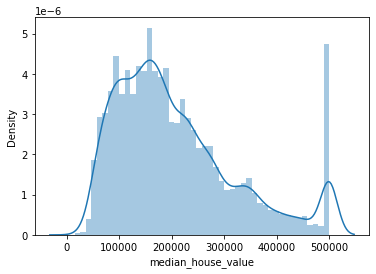

In [5]:
sns.distplot(df_train['median_house_value']);

In [6]:
print("Skewness: %f" % df_train['median_house_value'].skew())
print("Kurtosis: %f" % df_train['median_house_value'].kurt())

Skewness: 0.977763
Kurtosis: 0.327870


The graph visually shows us that the data is in fact skewed to the right with the exception of the sum at '500,000' mean house value but this doesn't really affect the skewness. I followed up this observation by working out the statistical value of the skewness. 
The skewness = 0.0977763 this is between 0.5-1 which confirms that the data is positively skewed so majority of the data exist in the lower region of the house value.


# Graphs & visualisations 

I then go one to assess the realtionship between the two variables in a scatter graph, this help to identify visually what the correlation (if any) is currently existing between the two variables. 

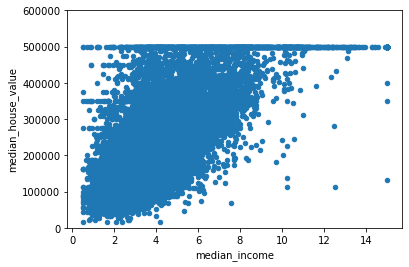

In [7]:
var = 'median_income'
data = pd.concat([df_train['median_house_value'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='median_house_value', ylim=(0,600000));

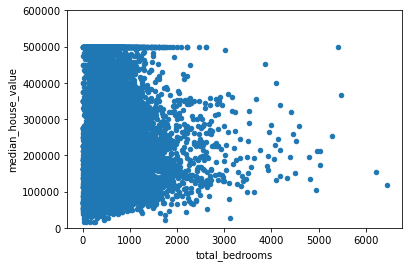

In [8]:
var ='total_bedrooms'
data = pd.concat([df_train['median_house_value'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='median_house_value', ylim=(0,600000));

Analyses with a box plot:
The box plot also referred to as the whisker diagram is a method used to display the distribution of the following: minimum, lower quartile, median, upper quartile and maximum. This similar to the df_train.decribe() function helps us visualise the overview of our data.


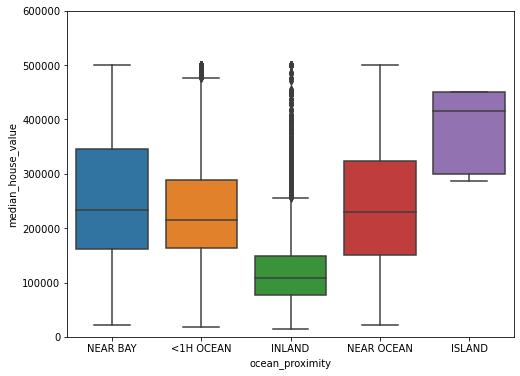

In [9]:
var = 'ocean_proximity'
data = pd.concat([df_train['median_house_value'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="median_house_value", data=data)
fig.axis(ymin=0, ymax=600000);

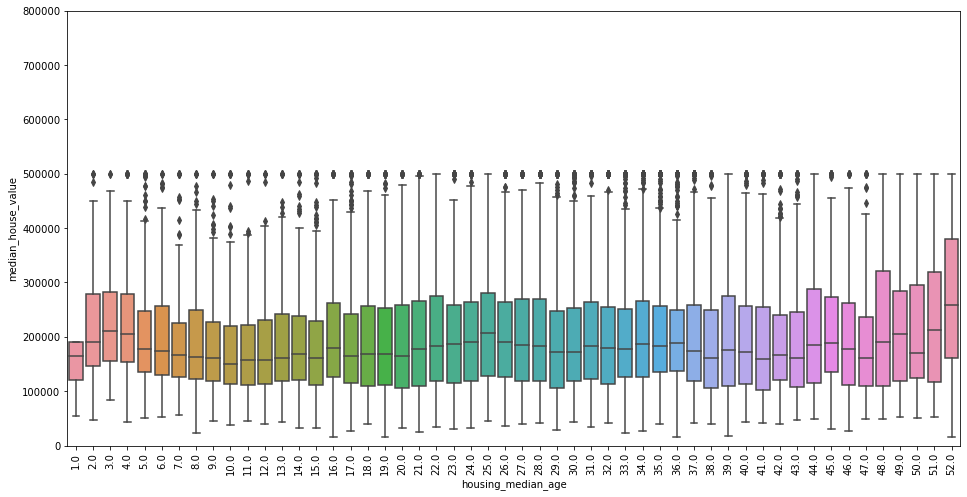

In [10]:
var = 'housing_median_age'
data = pd.concat([df_train['median_house_value'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="median_house_value", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Correlations: 
The heatmap is a quick way to get an overview of what the correlations in our different variables represents. 


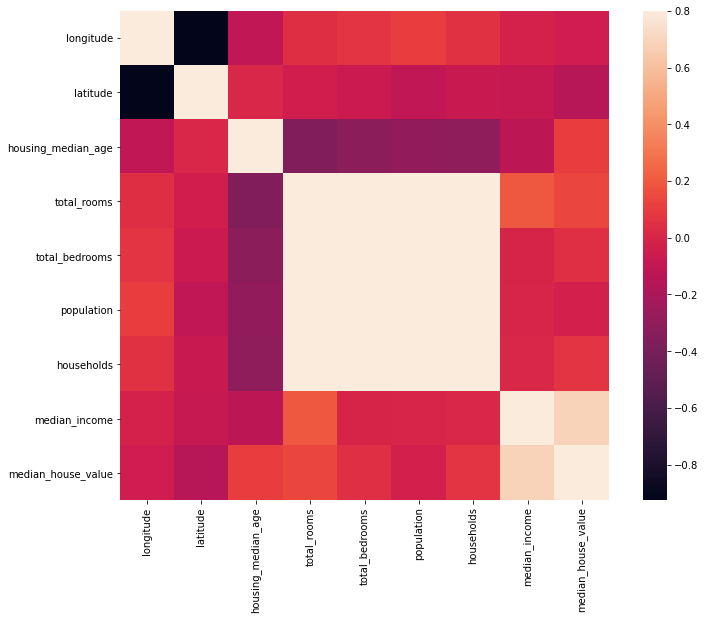

In [11]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


# Missing Values and outliers

When looking at the missing values its important to look at:

    •	How much of the data have missing values? 
    •	Is there pattern with these missing values or is it random? 

This will allow us to look into the quality or our data and thus would allow us to proceed with understanding the accuracy of the results we are producing. 


In [38]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
total_bedrooms,207,0.010029
ocean_proximity,0,0.000000
median_house_value,0,0.000000
median_income,0,0.000000
households,0,0.000000
population,0,0.000000
total_rooms,0,0.000000
housing_median_age,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


In [39]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [32]:
median_house_value_scaled = StandardScaler().fit_transform(df_train['median_house_value'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-4.33852665]
 [-4.33852665]
 [-4.33852665]
 [-4.33852665]
 [-4.06755189]
 [-3.62596819]
 [-3.62596819]
 [-3.62596819]
 [-3.62596819]
 [-3.4408396 ]]

outer range (high) of the distribution:
[[1.82295455]
 [1.82295455]
 [1.82295455]
 [1.82295455]
 [1.82295455]
 [1.82295455]
 [1.82295455]
 [1.82295455]
 [1.82295455]
 [1.82295455]]


# Normality 

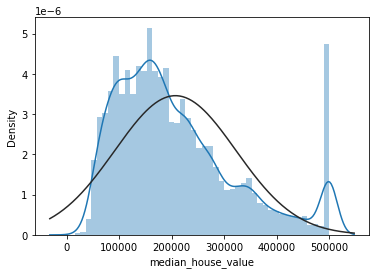

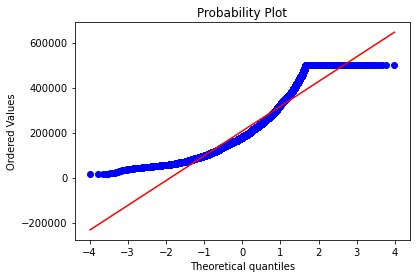

In [13]:
#histogram and normal probability plot
sns.distplot(df_train['median_house_value'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['median_house_value'], plot=plt)

In [14]:
#applying log transformation
df_train['median_house_value'] = np.log(df_train['median_house_value'])

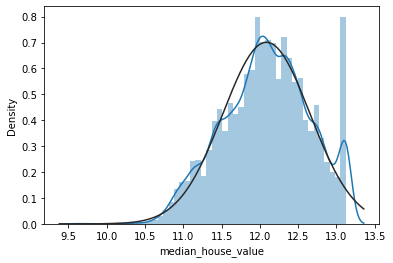

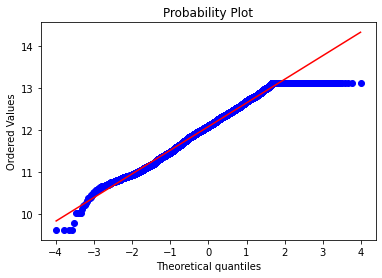

In [15]:
#transformed histogram and normal probability plot
sns.distplot(df_train['median_house_value'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['median_house_value'], plot=plt)

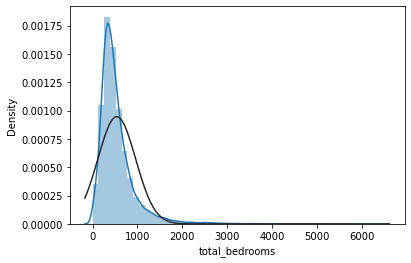

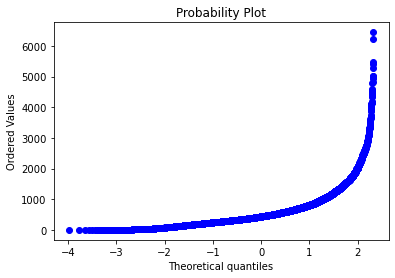

In [16]:
#histogram and normal probability plot
sns.distplot(df_train['total_bedrooms'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['total_bedrooms'], plot=plt)

In [17]:
#applying log transformation
df_train['total_bedrooms'] = np.log(df_train['total_bedrooms'])

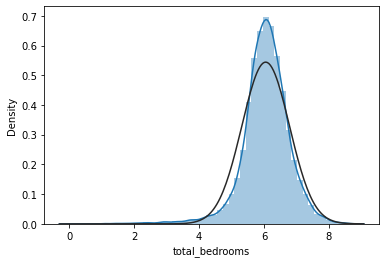

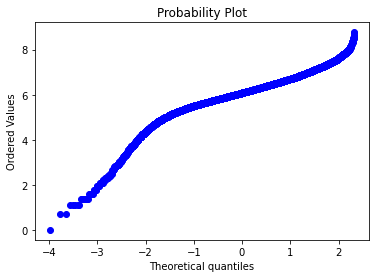

In [18]:
#transformed histogram and normal probability plot
sns.distplot(df_train['total_bedrooms'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['total_bedrooms'], plot=plt)

# using scikit learn Linear regression model 

In [20]:

x = df_train['median_income']
y = df_train['median_house_value']

In [21]:
def normalize_data(target_df):
  mu = target_df.mean()
  segma = target_df.std()
  return (target_df - mu ) / segma

In [22]:

x = normalize_data(x)

<AxesSubplot:xlabel='median_income', ylabel='Count'>

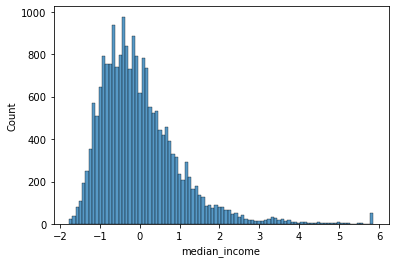

In [23]:
sns.histplot(x)
     

In [25]:

from sklearn.linear_model import LinearRegression
x = df_train['median_income']
y = df_train['median_house_value']

x = normalize_data(x)
X = x.values.reshape(-1,1)
lr_reg = LinearRegression().fit(X, y)

In [28]:

x_test  =  df_train["median_income"]
x_test = normalize_data(x_test)
y_test = df_train["median_house_value"]
y_pred = lr_reg.predict(x_test.values.reshape(-1,1))

In [29]:
lr_reg.score(x_test.values.reshape(-1,1),y_test)
     

0.4335307321151409

In [30]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
r2_score(y_test, y_pred)

0.4335307321151409